Nesse notebook, irei enunciar a regressão linear multivariada e motivar seu uso ao invés da realização de $p$ regressões simples num conjunto de dados de $p, p\ge2$ preditores

## Importações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'

## Conjunto de dados
Irei criar um dataset sintético contendo duas variáveis preditoras, $X_1$ e $X_2$ e uma variável de resposta $y$. Para motivar o exemplo, considere que $X_1$ represente a temperatura (em graus celsius) numa determinada cidade litorânea, enquanto $X_2$ a quantidade de ataques de tubarão nas praias dessa mesma cidade.

### **Problema**: Predição do número de vendas de sorvete

Faremos também um breve exercício sobre causalidade, onde iremos propor hipóteses causais (facilmente verificadas) e confrontá-las com absurdos estatísticos (espurios) que podem gerar falsas interpretações dos resultados. É evidente que um dos fatores que impacta o aumento nas vendas de sorvetes  é a temperatura, uma vez que é prática comum consumir esse tipo de alimento em momentos onde o clima está mais intenso. Outra variável altamente associada a temperatura é a quantidade de banhistas nas praias, que aqui serve como variável âncora com relação ao número de ataques de tubarões. Contudo, associá-la diretamente a resposta (número de vendas) é um equívoco. Iremos resolver essa falsa interpretação usando regressão multivariada

In [13]:
# Fixar a semente para reprodutibilidade
np.random.seed(42)

# Tamanho do dataset
n = 200

# Gerar variáveis sintéticas
temperaturas = np.random.normal(31, 5, n)
ataques = (temperaturas + np.random.normal(0,2,n))/10  # X2 altamente correlacionada com X1
vendas = 0.6 * temperaturas + np.random.normal(0, 2, n)  # Somente X1 impacta y

In [14]:
# Criar um DataFrame
data = pd.DataFrame({'Temperatura': temperaturas, 'Ataques': ataques, 'Vendas': vendas})

> Os valores aqui são irrelevantes, o único objetivo desse exercício é quanto a forma/estrutura da relação entre as variáveis

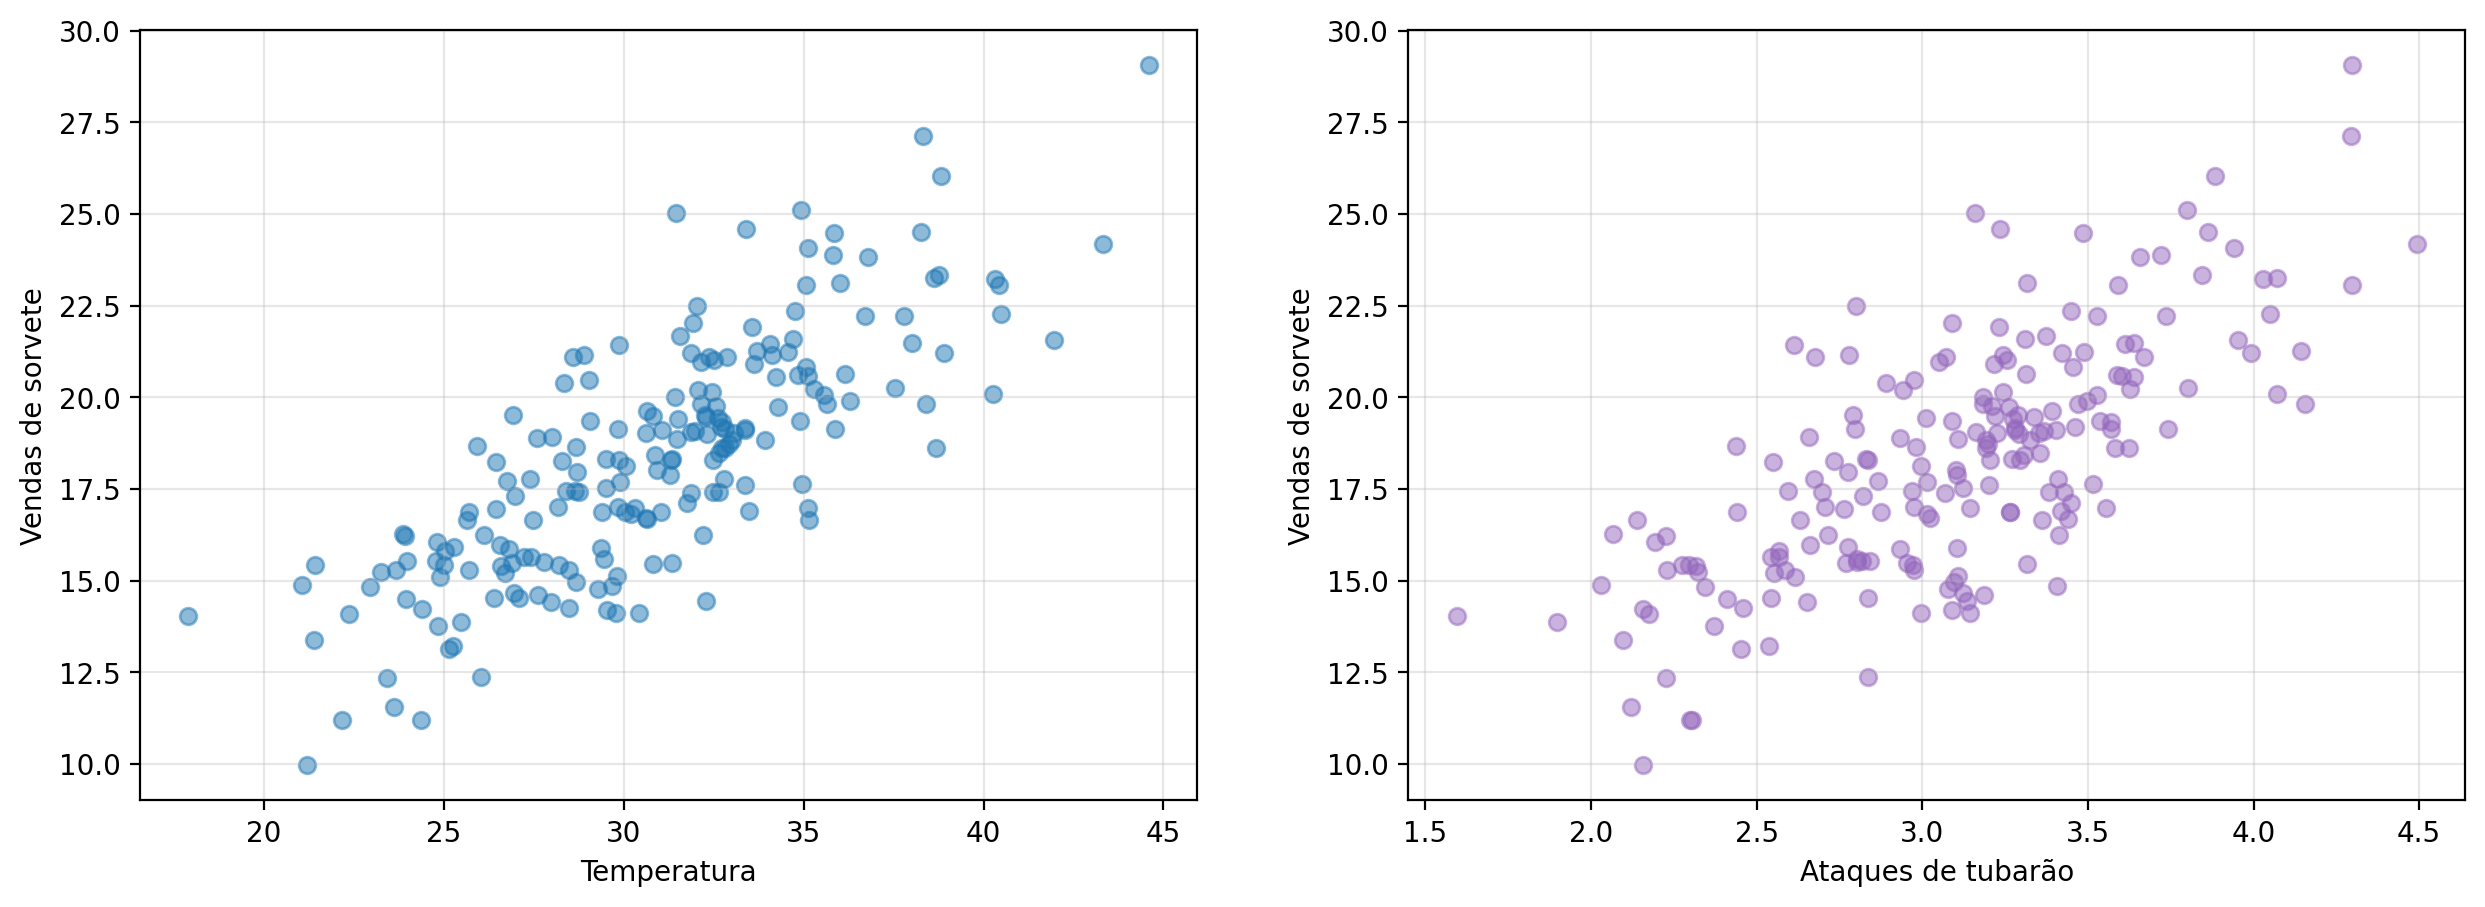

In [15]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

axes[0].scatter(temperaturas,vendas,color='tab:blue',alpha=0.5)
axes[0].set_xlabel("Temperatura")

axes[1].scatter(ataques,vendas,color='tab:purple',alpha=0.5)
axes[1].set_xlabel("Ataques de tubarão")

for ax in axes:
    ax.grid(alpha=0.3)
    ax.set_ylabel("Vendas de sorvete")
plt.show()

A variável que **melhor explica** o aumento na quantidade de vendas de sorvete é a temperatura. Contudo, qualquer variável que esteja positivamente associada a ela também terá forte correlação com a resposta quando analisamos as variáveis aos pares. Isso muda quando consideramos todas as variáveis preditoras em nosso modelo.

### Regressão Linear Simples

Modelo que relaciona a temperatura com número de vendas de sorvete

In [16]:
# Regressão Linear Simples - X1
model_X1 = LinearRegression()
model_X1.fit(temperaturas.reshape(-1, 1), vendas)
y_pred_X1 = model_X1.predict(temperaturas.reshape(-1, 1))
r2_X1 = r2_score(vendas, y_pred_X1)

Reta da regressão de $X_1$ em $y$

$$y=0.542X_1 + 1.593$$

In [19]:
print(f"{round(r2_X1,4)*100}% da variabilidade nas vendas é explicada pela temperatura")

62.18% da variabilidade nas vendas é explicada pela temperatura


In [20]:
# Regressão Simples - X1
calculate_regression_stats(data[['Temperatura']], data['Vendas'], "Simples (X1)")


Simples (X1) Regression Statistics:


,Estimated Value,t-statistic,p-value,Standard Error
const,1.593720,1.701375,9.044235e-02,0.936725
Temperatura,0.542687,18.043248,1.114777e-43,0.030077


O *p-value* para o coeficiente estimado de `Temperatura` nos diz que esta variável é estatisticamente relevante.

Modelo que relaciona quantidade de ataques de tubarão com número de vendas de sorvete

In [23]:
# Regressão Linear Simples - X2
model_X2 = LinearRegression()
model_X2.fit(ataques.reshape(-1, 1), vendas)
y_pred_X2 = model_X2.predict(ataques.reshape(-1, 1))
r2_X2 = r2_score(vendas, y_pred_X2)

Reta da regressão de $X_2$ em $y$

$$y=0.398X_2 - 0.267$$

In [25]:
print(f"{round(r2_X2,4)*100}% da variabilidade nas vendas é explicada pela temperatura")

52.71% da variabilidade nas vendas é explicada pela temperatura


In [26]:
# Regressão Simples - X2
calculate_regression_stats(data[['Ataques']], data['Vendas'], "Simples (X2)")


Simples (X2) Regression Statistics:


,Estimated Value,t-statistic,p-value,Standard Error
const,4.524344,4.809467,2.991525e-06,0.940716
Ataques,4.450428,14.856721,4.890556e-34,0.299557


O *p-value* para o coeficiente estimado de `Ataques` nos diz que esta variável é estatisticamente relevante.

Analisando as estatísticas dos parâmetros estimados para os modelos de regressão simples, tanto $X_1$ quanto $X_2$ ajudam a explicar a variabilidade no número de vendas de sorvete embora, na prática saibamos que isso não é verdade. Mas como "desmintir" esse fato?

## Regressão Linear Multivariada

In [29]:
# Regressão Linear Multivariada - X1 e X2
model_multivar = LinearRegression()
model_multivar.fit(data[['Temperatura', 'Ataques']], vendas)
y_pred_multivar = model_multivar.predict(data[['Temperatura', 'Ataques']])
r2_multivar = r2_score(vendas, y_pred_multivar)

$$
y=0.550X_1 - 0.020X_2 - 0.035
$$

In [31]:
# Regressão Multivariada - X1 e X2
calculate_regression_stats(data[['Temperatura', 'Ataques']], data['Vendas'], "Multivariate (X1 & X2)")


Multivariate (X1 & X2) Regression Statistics:


,Estimated Value,t-statistic,p-value,Standard Error
const,1.572109,1.668874,9.673090e-02,0.942018
Temperatura,0.563683,7.030171,3.303647e-11,0.080180
Ataques,-0.201816,-0.282593,7.777854e-01,0.714156


Realizando a regressão multivariada, levamos em consideração a influência de ambos os preditores. Nesse caso, é possível verificar que a correlação entre o número de vendas de sorvetes e quantidade de ataques de tubarão era expúria. Isto é, motivada por uma mera correlação entre temperatura e quantidade de banhistas na praia.

Analisando o *p-value* do coeficiente estimado para `Ataques`, note que ele não é estatisticamente significante. Isto é, *p-value* $>0.05$

In [10]:
# Função para calcular estatísticas dos coeficientes
def estatisticas_dos_coeficientes(X, y, model_name):
    
    # Adicionar constante ao modelo
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()

    # Criar DataFrame com estatísticas
    stats = pd.DataFrame({
        # "Coefficient": ["Intercept"] + [f"Coef {i+1}" for i in range(X.shape[1])],
        "Estimated Value": model.params,
        "t-statistic": model.tvalues,
        "p-value": model.pvalues,
        "Standard Error": model.bse
    })

    print(f"\n{model_name} - Estatísticas dos Coeficientes:")
    return stats